## Fetching coronavirus-19(COVID-19) pandemic data from Wikipedia

In this assignment you will be given several tasks which include data gathering, cleansing and visualization.
The data source will be this wikipedia page https://en.wikipedia.org/wiki/2019%E2%80%9320_coronavirus_pandemic featuring several tables for individual countries, subcontinents as well as timelines. You will need to be skillful in using Python to complete these tasks. Good luck!

### We will go through the following steps:
* fetching html containing the data we need using BeautifulSoup
* parsing the html to extract the data in dictionary format
* converting the data to a pandas dataframe
* visualizing the data using pandas and matplotlib

Several guidelines will be provided to help you complete your assignment with ease.

In [ ]:
# special IPython command to prepare the notebook for matplotlib
# Please install Python 3.X (not 2.X)
%matplotlib inline 

from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import requests
from bs4 import BeautifulSoup

## 0. Fetching the Wikipedia site

#### The html code normally looks like this (you can even manually inspect it with Chrome, Firefox etc)

> *`<!DOCTYPE html>`*<br/>
> *`<html class="client-nojs" lang="en" dir="ltr">`*<br/>
> *`<head>`*<br/>
> *`<meta charset="UTF-8"/>`*<br/>
> *`<title>Some website name</title>`*<br/>
> *`...`*<br/>
> *`</script>`*<br/>
> *`</body>`*<br/>
> *`</html>`*<br/>

with lots of divs as well... 

##### HINT: Use requests library to fetch the html source


In [ ]:
url = 'https://en.wikipedia.org/wiki/2019%E2%80%9320_coronavirus_pandemic_by_country_and_territory'
req = None
##################################################################################

# YOUR CODE HERE #
req = requests.get(url)
print(req)
##################################################################################



<Response [200]>


## 1. Parsing html code

With the html code, we are going to extract the following tables named, 
* #### COVID-19 cases, deaths, and rates by locations (*from the "Total cases, deaths, and death rates by country" section*)
* #### 2022 monthly cumulative COVID-19 deaths (*from the "Cumulative monthly death totals by country (World Health Organization)" section*)
* #### 2021 (second-half) monthly cumulative COVID-19 deaths (*from the "Cumulative monthly death totals by country (World Health Organization)" section*)
* #### COVID-19 vaccine distribution (*from the "Vaccinations" section*)

After you parsed the html code and retrieve the above four tables,  **print the html source code for each table**.

One of the tables may look like this,

> *`<table class="multiple classes" ...>`*<br/>
> *`<caption><a href="..." title="COVID-19">'''NAME OF THE TABLE<-IMPORTANT''' ... </caption>`*<br/>
> *`<tbody>"..."</tbody>`*<br/>
> *`<th>"..."</th>`*<br/>
> *`<tr>"..."</tr>`*<br/>
> *`...`*<br/>
> *`<tr>"..."</tr>`*<br/>
> *`</table>`*<br/>

##### HINT: First, study the html source and find code blocks related to tabular data. 
##### HINT: Then, use BeautifulSoup to "scrap the tabular data of html by "tracking" elements with class/id attributes


In [ ]:
"""Step 1. Study the HTML Source"""
html_source = None
##################################################################################

# YOUR CODE HERE #

html_source = BeautifulSoup(req.text)
tmp = html_source.select('div#covid-19-cases-deaths-and-rates-by-location table')
df = pd.read_html(str(tmp))
df = pd.DataFrame(df[0])
data = df.drop(["Unnamed: 0"],axis=1)
data.head()
print(html_source)
##################################################################################





In [ ]:
"""Step 2. Retrieve all the tables (OPTIONAL)"""

##################################################################################

# YOUR CODE HERE #
tables = []
# select는 리스트를 반환한다 그래서 [0]번째 인덱스를 참조해야한다
tmp = html_source.select('div#covid-19-cases-deaths-and-rates-by-location table')[0]
tables.append(tmp)
tmp = html_source.select('div#2022-1st-half-monthly-cumulative-covid-19-deaths table')[0]
tables.append(tmp)
tmp = html_source.select('div#2021-2nd-half-monthly-cumulative-covid-19-deaths table')[0]
tables.append(tmp)
tmp = html_source.select('div#covid-19-vaccine-distribution-by-country table')[0]
tables.append(tmp)
##################################################################################
print(len(tables))


4


In [ ]:
"""Step 3. Get the four tables we need for this assignment and print each of its html source"""
"""Table 1. COVID-19 cases, deaths, and rates by locations"""
##################################################################################

# YOUR CODE HERE #
print(tables[0])

##################################################################################

In [ ]:
"""Table 2. 2022 monthly cumulative COVID-19 deaths"""
##################################################################################

# YOUR CODE HERE #

print(tables[1])

##################################################################################

In [ ]:
"""Table 3. 2021 (second-half) monthly cumulative COVID-19 deaths"""
##################################################################################

# YOUR CODE HERE #

print(tables[2])

##################################################################################

In [ ]:
"""Table 4. COVID-19 vaccine distribution"""
##################################################################################

# YOUR CODE HERE #

print(tables[3])

##################################################################################

## 2. Extracting data from the four tables and converting them into four dictionaries (Python data stucture)
With the four tables, we are going to extract data and convert each of them into a dictionary 

*ALL FOUR DICTIONARIES must be printed!!*

##### HINT: A pythonic dictionary from one of the tables will look like this,
- { *some index 1*: { *some column 1*: *some value 1*, *some column 2*: *some value 2*, ...}, 
    *some index 2*: { *some column 1*: *some value 1*, *some column 2*: *some value 2*, ...}}
- *Dictionary data structure does not have order between Keys, so it may show up in different order(index).  You don't need to be worried of it*

In [ ]:
"""Hint 1. Examine the actual table posted in the Wikipedia page and identify the columns."""
"""Hint 2. These columns will be necessary for converting the html-based data to dictionary format."""
"""Hint 3. Beautiful soup will help you get all you need."""


"""Table 1. COVID-19 cases, deaths, and rates by locations"""
output_dict1 = dict()
##################################################################################

# YOUR CODE HERE #
headers = [heading.text.rstrip() for heading in tables[0].select('tr.sticky-row th')]
# 빈 값과 country가 있다 그래서 2개를 버린다
del headers[0]
del headers[0]
#print(headers)
for index,rows in enumerate(tables[0].select('tr')):
  # 0은 헤더, 1은 world가 있다
  if index == 0 or index ==1:
    continue

  country = rows.find('th')
  # 마지막에 설명이 있다 그래서 무시한다
  if country is None:
    continue
  country = country.text.rstrip()

  data = [item.text.rstrip().replace(',','') for item in rows.select('td')]
  del data[0]

  tmp = dict()
  for x in range(3):
    tmp[headers[x]] = data[x]
output_dict1[country] = tmp
# print(output_dict1) should look like the below cell!

##################################################################################

In [ ]:
"""
    {
        'Peru': {'Deaths / million': '6365', 'Deaths': '212354', 'Cases': '3548717'},
        'Bulgaria': ...,
        ...
        'Marshall Island': ...
    }   
"""
print(output_dict1)

In [ ]:
"""Table 2. 2022 monthly cumulative COVID-19 deaths"""
output_dict2 = dict()
##################################################################################

# YOUR CODE HERE #
headers = [heading.text.rstrip() for heading in tables[1].select('tr.sticky-row th')]

# 빈 값과 location이 있다 그래서 2개를 버린다
del headers[0]
del headers[0]
#print(headers)
for index,rows in enumerate(tables[1].select('tr')):
  # 0은 헤더, 1은 world가 있다
  if index == 0 or index ==1:
    continue

  country = rows.find('th')
  # 마지막에 설명이 있다 그래서 무시한다
  if country is None:
    continue
  country = country.text.rstrip()

  data = [item.text.rstrip().replace(',','') for item in rows.select('td')]
  del data[0]

  tmp = dict()
  for x in range(3):
    tmp[headers[x]] = data[x]
  output_dict2[country] = tmp
# print(output_dict2) should look like the below cell!

##################################################################################

In [ ]:
"""
    {
        'United States': {'Jan 1': '819197', 'Feb 1': '881867', 'Mar 1': '941112'},
        'Brazil': ...,
        ...
        'Vanuatu': ...
    }   
"""
print(output_dict2)

In [ ]:
"""Table 3. 2021 (second-half) monthly cumulative COVID-19 deaths"""
output_dict3 = dict()
##################################################################################

# YOUR CODE HERE #

headers = [heading.text.rstrip() for heading in tables[2].select('tr.sticky-row th')]

# 빈 값과 location이 있다 그래서 2개를 버린다
del headers[0]
del headers[0]
#print(headers)
for index,rows in enumerate(tables[2].select('tr')):
  # 0은 헤더, 1은 world가 있다
  if index == 0 or index ==1:
    continue

  country = rows.find('th')
  # 마지막에 설명이 있다 그래서 무시한다
  if country is None:
    continue
  country = country.text.rstrip()

  data = [item.text.rstrip().replace(',','') for item in rows.select('td')]
  #첫번째는 비어있다
  del data[0]

  tmp = dict()
  for x in range(6):
    tmp[headers[x]] = data[x]
  output_dict3[country] = tmp

# print(output_dict3) should look like the below cell!

##################################################################################


In [ ]:
"""
    {
        'United States': {'Jul 1': '600853', 'Aug 1': '610606', ... ,'Nov 1': '743217', 'Dec 1': '774868'},
        'Brazil': ...,
        ...
        'Vanuatu': ...
    }   
"""
print(output_dict3)

In [ ]:
"""Table 4. COVID-19 vaccine distribution"""
output_dict4 = dict()

##################################################################################

# YOUR CODE HERE #

headers = [ heading for heading in tables[3].select('tr.sticky-row th')]
# th 태그의 자식 태그가 존재할 수 있다 sup(위 첨자) 자식이 존재하면 제거해야한다
for head in headers:
  if head.find('sup'):
    head.sup.decompose()
headers = [pure_head.text.rstrip() for pure_head in headers]

# 빈 값과 location이 있다 그래서 2개를 버린다
del headers[0]
del headers[0]
#print(headers)
for index,rows in enumerate(tables[3].select('tr')):
  # 0은 헤더, 1은 world가 있다
  if index == 0 or index ==1:
    continue

  country = rows.find('th')
  # 마지막에 설명이 있다 그래서 무시한다
  if country is None:
    continue
  # 나라이름에도 sup 태그가 있을 수 있다
  if country.find('sup'):
    country.sup.decompose()
  country = country.text.rstrip()

  data = [item.text.rstrip().replace('%','') for item in rows.select('td')]
  
  #첫번째는 비어있다
  del data[0]

  tmp = dict()
  for x in range(2):
    tmp[headers[x]] = data[x]
  output_dict4[country] = tmp

# print(output_dict4) should look like the below cell!

##################################################################################

In [ ]:
"""
    {
        'China': {'Vaccinated': '1,275,541,000', 'Percent': '88.32'},
        'India': ...,
        ...
        'North Korea': ...
    }   
"""
# Vaccinated 는  ',' 나중에 제거한다
print(output_dict4)

## 3. Converting the 4 Pythonic dictionaries to Pandas Dataframes and then Merging them

* Typically, a pandas dataframe looks like this,
* i.e. indices: countries, columns: period
<table>
  <tr>
    <th></th>
    <th>1950 /<br>1955</th>
    <th>1955 /<br>1960</th>
    <th>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</th>
    <th>2010 /<br>2015</th>
  </tr>
  <tr>
    <td>Singapore</td>
    <td>60.99</td>
    <td>43.2</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>1.77</td>
  </tr>
  <tr>
    <td>Iceland</td>
    <td>21.43</td>
    <td>18.5</td>
    <td></td>
    <td>2.03</td>
  </tr>
  <tr>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td></td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td></td>
  </tr>
  <tr>
    <td>Sierra Leone</td>
    <td>236.9</td>
    <td>229.39</td>
    <td></td>
    <td>94.43</td>
  </tr>
</table>

3-1) With the four dictionaries, we are going to convert each of them into four dataframes

* ALL FOUR DATAFRAMES must be printed!!
* ALL FOUR DATAFRAMES must have countries as indices

##### HINT: There is a really nice pandas function that directly builds the dataframe using your dictionary 

3-2) With the four dataframes, we are going to double-check whether they have the same indices

After that, we will merge them into one single pandas dataframe

* The MERGED DATAFRAME must be printed!!
* The MERGED DATAFRAME must have countries as indices

##### HINT:

In [ ]:
"""Four Dictionaries -> Four DataFrames"""
df1, df2, df3, df4 = None, None, None, None
merged_df = None
##################################################################################

# YOUR CODE HERE #
df1 = pd.DataFrame.from_dict(output_dict1,orient = 'index') # 216 rows
df2 = pd.DataFrame.from_dict(output_dict2,orient = 'index') # 237 rows
df3 = pd.DataFrame.from_dict(output_dict3,orient = 'index') # 237 rows
df4 = pd.DataFrame.from_dict(output_dict4,orient = 'index') # 221 rows

##################################################################################

In [ ]:
print(df1)

                                             Deaths / million  Deaths    Cases
Peru                                                     6368  212438  3550791
Bulgaria                                                 5319   36685  1144822
Bosnia and Herzegovina                                   4820   15732   376081
Hungary                                                  4745   45721  1868007
North Macedonia                                          4436    9240   307507
...                                                       ...     ...      ...
Falkland Islands                                            —       —      128
Vatican City                                                —       0       29
Saint Helena, Ascension and Tristan da Cunha                —       —        4
Marshall Islands                                            —       —        7
Federated States of Micronesia                              —       0        1

[216 rows x 3 columns]


In [ ]:
print(df2)

                Jan 1   Feb 1   Mar 1
United States  819197  881867  941112
Brazil         618984  626854  649134
India          481486  496242  514023
Russia         309707  332012  352446
Mexico         301663  310131  318149
...               ...     ...     ...
Tokelau             0       0       0
Tonga               0       0       0
Turkmenistan        0       0       0
Tuvalu              0       0       0
Vanuatu             0       0       0

[237 rows x 3 columns]


In [ ]:
print(df3)

                Jul 1   Aug 1   Sep 1   Oct 1   Nov 1   Dec 1
United States  600853  610606  642770  697430  743217  774868
Brazil         515985  555460  579574  596122  607694  614376
India          399459  424351  439020  448339  458437  469247
Mexico         238055  245959  267253  283091  290717  293950
Russia         135886  159352  184014  208142  239693  276419
...               ...     ...     ...     ...     ...     ...
Tokelau             0       0       0       0       0       0
Tonga               0       0       0       0       0       0
Turkmenistan        0       0       0       0       0       0
Tuvalu              0       0       0       0       0       0
Vanuatu             0       0       0       0       0       0

[237 rows x 6 columns]


In [ ]:
print(df4)

                     Vaccinated Percent
China             1,278,724,000   88.54
India               993,426,348   71.29
European Union      336,335,600   75.21
United States       255,975,678   77.10
Indonesia           197,216,895   71.36
...                         ...     ...
Montserrat                1,897   38.08
Niue                      1,650  102.23
Tokelau                     968   70.76
Pitcairn Islands             47  100.00
North Korea                   0    0.00

[221 rows x 2 columns]


In [ ]:
"""
    It would be great if the columns of merged_df are ordered as,
    
    Deaths / million 	Deaths 	Cases 	Jul 1 	Aug 1 	Sep 1 	Oct 1 	Nov 1 	Dec 1	Jan 1 	Feb 1 	Mar 1  	Vaccinated 	Percent
"""
merged_df = pd.merge(left = df1, right = df3, left_index = True,right_index = True, how = 'inner' ) # 201 rows 9 col

merged_df = pd.merge(left = merged_df, right = df2, left_index = True,right_index = True, how = 'inner') # 201 rows 12 col
merged_df = pd.merge(left = merged_df, right = df4, left_index = True,right_index = True, how = 'inner') # 197 rows 14 col

print(merged_df)

                       Deaths / million  Deaths    Cases   Jul 1   Aug 1  \
Peru                               6368  212438  3550791  192331  196291   
Bulgaria                           5319   36685  1144822   18061   18213   
Bosnia and Herzegovina             4820   15732   376081    9647    9689   
Hungary                            4745   45721  1868007   29992   30026   
North Macedonia                    4436    9240   307507    5484    5493   
...                                 ...     ...      ...     ...     ...   
Chad                                 11     192     7349     174     174   
Vanuatu                               9       3     4922       0       0   
Burundi                               3      38    38663       8       9   
Cook Islands                          —       —     3171       0       0   
Falkland Islands                      —       —      128       0       0   

                         Sep 1   Oct 1   Nov 1   Dec 1   Jan 1   Feb 1  \
Peru         

## 4. Cleansing and Analyzing the Data
You will need to do data cleansing before moving on to the last step. 

* The datatypes in the current merged dataframe will be non-numeric, which might be a little pesky in your assignment. We will need to remedy this issue.
<br>
<br>
* As shown in the original data source from Wikipedia, there are some non-numeric "string" values which will need to be replaced by nan. 
<br>
<br>
* Next, we are also going to remove rows that have at least one "nan". As a result, we will have a fully-completed dataframe prepared for analysis.
<br>
<br>
* The overall shape of the dataframe should be 195 X 14 meaning 195 countries and 14 columns.
<br>
<br>
* Follow the instructions and print the output for each step!


In [ ]:
"""Step 1. Check each column's data type in the merged dataframe"""
##################################################################################

# 문자열 : object
print(merged_df.dtypes)

##################################################################################

Deaths / million    object
Deaths              object
Cases               object
Jul 1               object
Aug 1               object
Sep 1               object
Oct 1               object
Nov 1               object
Dec 1               object
Jan 1               object
Feb 1               object
Mar 1               object
Vaccinated          object
Percent             object
dtype: object


In [ ]:
"""Step 2. Find and Replace the non-numeric values with NaN. Then re-check the data types of each column. All of them should be float-based (float64)"""
##################################################################################

# YOUR CODE HERE #

#merged_df.replace('—', np.NaN, inplace=True)
merged_df['Vaccinated'] = merged_df['Vaccinated'].str.replace(',','')
merged_df = merged_df.apply(pd.to_numeric,errors='coerce')
merged_df = merged_df.astype('float')

merged_df
#print(merged_df.dtypes)


##################################################################################

,Deaths / million,Deaths,Cases,Jul 1,Aug 1,Sep 1,Oct 1,Nov 1,Dec 1,Jan 1,Feb 1,Mar 1,Vaccinated,Percent
Peru,6368.0,212438.0,3550791.0,192331.0,196291.0,198263.0,199367.0,200217.0,201144.0,202653.0,205505.0,210538.0,28753461.0,86.19
Bulgaria,5319.0,36685.0,1144822.0,18061.0,18213.0,18896.0,20882.0,23999.0,28453.0,30955.0,33318.0,35581.0,2083638.0,30.21
Bosnia and Herzegovina,4820.0,15732.0,376081.0,9647.0,9689.0,9803.0,10606.0,11555.0,12586.0,13442.0,14447.0,15459.0,943394.0,28.91
Hungary,4745.0,45721.0,1868007.0,29992.0,30026.0,30059.0,30199.0,30881.0,34713.0,39186.0,41471.0,44051.0,6403956.0,66.47
North Macedonia,4436.0,9240.0,307507.0,5484.0,5493.0,5938.0,6714.0,7147.0,7581.0,7976.0,8439.0,9025.0,852805.0,40.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Chad,11.0,192.0,7349.0,174.0,174.0,174.0,174.0,174.0,175.0,181.0,190.0,190.0,884691.0,5.23
Vanuatu,9.0,3.0,4922.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114284.0,36.34
Burundi,3.0,38.0,38663.0,8.0,9.0,10.0,14.0,14.0,14.0,14.0,15.0,15.0,10892.0,0.09
Cook Islands,NaN,NaN,3171.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15004.0,85.39


In [ ]:
"""Step 3. Drop the rows that contain at least one "nan". The shape of the updated dataframe should be (195, 14)"""

##################################################################################

# YOUR CODE HERE #
merged_df = merged_df.dropna()
print(merged_df.shape)

##################################################################################

(195, 14)


## 5-1. Calculating  "Deaths per Cases", "Vaccinated per Cases" and "Deaths per Vaccinated"

Make three columns "Deaths / Cases", "Vaccinated / Cases", "Deaths / Vaccinated" and calculate them to be added to the current merged dataframe

As a result, the shape of the updated dataframe should be (195, 17)

In [ ]:
##################################################################################

# YOUR CODE HERE #

merged_df['Deaths / Cases'] = merged_df['Deaths']/merged_df['Cases']
merged_df['Vaccinated / Cases'] = merged_df['Vaccinated']/merged_df['Cases']
merged_df['Deaths / Vaccinated'] = merged_df['Deaths']/merged_df['Vaccinated']


print(merged_df.shape)
print(merged_df.columns)

##################################################################################

(195, 17)
Index(['Deaths / million', 'Deaths', 'Cases', 'Jul 1', 'Aug 1', 'Sep 1',
       'Oct 1', 'Nov 1', 'Dec 1', 'Jan 1', 'Feb 1', 'Mar 1', 'Vaccinated',
       'Percent', 'Deaths / Cases', 'Vaccinated / Cases',
       'Deaths / Vaccinated'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

## 5-2. Calculating the Pearson Correlation between "Deaths / million" and "Percent"

According to the Wikipedia page, the "Percent" column means *Percentage of population that has received at least one dose of a COVID-19 vaccine.* 

Calculate the two columns of values and print it.

In [ ]:
pcorr = 0.0
##################################################################################

# YOUR CODE HERE #
pcorr = np.corrcoef(merged_df['Deaths / million'],merged_df['Percent'])
pcorr = pcorr[0][1]
#merged_df.corr() 0.274111
print(pcorr)

##################################################################################

0.2751702199744792


## 5-3. Plotting the Accumulated Death totals from 21-September to 22-March with top 10 countries with highest vaccination percentage.

Find the top 10 countries with highest vaccination percentage. 

Extract the accumulated death totals from Sep 1 (2021) to Mar 1 (2022) and plot it using matplotlib (the visualization should be line plots with a legend in upper left corner)

#### HINT:  Use the pandas function to sort the dataframe so that you get the top 10 countries and their associated data needed for plotting

                        Sep 1    Oct 1    Nov 1    Dec 1    Jan 1    Feb 1  \
Gibraltar                97.0     97.0     98.0     98.0    100.0    101.0   
United Arab Emirates   2041.0   2097.0   2136.0   2147.0   2164.0   2243.0   
Portugal              17743.0  17975.0  18157.0  18441.0  18955.0  19905.0   
Cuba                   5303.0   7436.0   8236.0   8304.0   8322.0   8399.0   
Chile                 36937.0  37468.0  37757.0  38346.0  39115.0  39721.0   
Brunei                    9.0     32.0     54.0     57.0     57.0     59.0   
Samoa                     0.0      0.0      0.0      0.0      0.0      0.0   
Malta                   441.0    457.0    461.0    468.0    477.0    550.0   
Singapore                55.0     95.0    407.0    718.0    828.0    855.0   
Cayman Islands            2.0      2.0      2.0      5.0     11.0     15.0   

                        Mar 1  
Gibraltar               101.0  
United Arab Emirates   2301.0  
Portugal              21063.0  
Cuba         

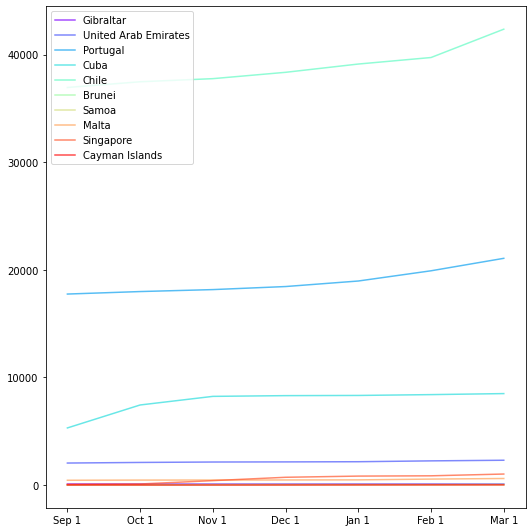

In [ ]:
plt.rcParams["figure.figsize"] = [7.50, 7.50]
plt.rcParams["figure.autolayout"] = True
overlapping = 0.7
colors = cm.rainbow(np.linspace(0, 1, 10))
##################################################################################

# YOUR CODE HERE #
# for color, country in zip(colors, some_countries):
#     plt.plot(values.loc[country,some_columns] ,c=color, alpha=overlapping, label=country)
# YOUR CODE HERE #
list_of_column = ['Sep 1','Oct 1','Nov 1','Dec 1','Jan 1','Feb 1','Mar 1']
sorted_merged_df = merged_df.sort_values(by = 'Percent',ascending=False)
top_ten_df = sorted_merged_df[list_of_column].head(10)
some_countries = top_ten_df.index
print(top_ten_df)

for color, country in zip(colors,some_countries):
  plt.plot(top_ten_df.loc[country,list_of_column],c=color,alpha=overlapping, label=country)
  plt.legend(loc='upper left')

##################################################################################

## 5-4. Plotting the Accumulated Death totals from 21-September to 22-March with top 10 countries with lowest vaccination percentage.

Find the top 10 countries with lowest vaccination percentage. 

Extract the accumulated death totals from Sep 1 (2021) to Mar 1 (2022) and plot it using matplotlib (the visualization should be line plots with a legend in upper left corner)

#### HINT:  Use the pandas function to sort the dataframe so that you get the top 10 countries and their associated data needed for plotting

                   Sep 1   Oct 1   Nov 1   Dec 1   Jan 1   Feb 1   Mar 1
Tanzania            50.0   719.0   725.0   730.0   737.0   778.0   798.0
Mali               539.0   548.0   563.0   606.0   660.0   714.0   722.0
Chad               174.0   174.0   174.0   175.0   181.0   190.0   190.0
Cameroon          1357.0  1459.0  1686.0  1804.0  1851.0  1880.0  1923.0
South Sudan        120.0   130.0   133.0   133.0   136.0   137.0   137.0
Madagascar         956.0   960.0   963.0   967.0  1027.0  1274.0  1366.0
Papua New Guinea   192.0   234.0   370.0   546.0   590.0   597.0   638.0
Yemen             1472.0  1721.0  1889.0  1950.0  1984.0  2012.0  2135.0
Haiti              586.0   629.0   679.0   738.0   766.0   804.0   820.0
Burundi             10.0    14.0    14.0    14.0    14.0    15.0    15.0


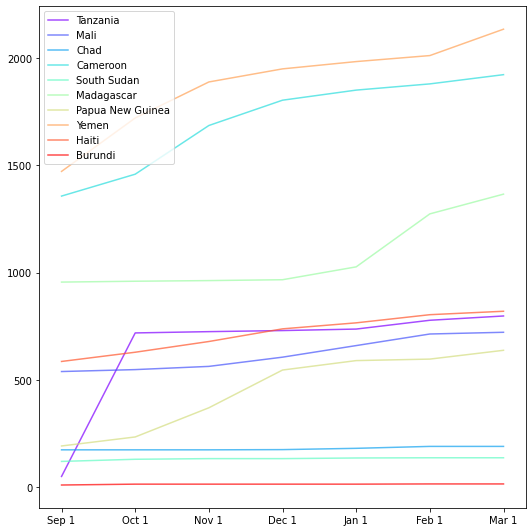

In [ ]:
plt.rcParams["figure.figsize"] = [7.50, 7.50]
plt.rcParams["figure.autolayout"] = True
overlapping = 0.7
colors = cm.rainbow(np.linspace(0, 1, 10))
##################################################################################

# YOUR CODE HERE #
# for color, country in zip(colors, some_countries):
#     plt.plot(values.loc[country,some_columns] ,c=color, alpha=overlapping, label=country)
# YOUR CODE HERE #
list_of_column = ['Sep 1','Oct 1','Nov 1','Dec 1','Jan 1','Feb 1','Mar 1']
sorted_merged_df = merged_df.sort_values(by = 'Percent',ascending=False)
top_ten_df = sorted_merged_df[list_of_column].tail(10)
some_countries = top_ten_df.index
print(top_ten_df)

for color, country in zip(colors,some_countries):
  plt.plot(top_ten_df.loc[country,list_of_column],c=color,alpha=overlapping, label=country)
  plt.legend(loc='upper left')

##################################################################################